In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [3]:
np.random.seed(42)
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30), +
            math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [4]:
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

In [5]:
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600))for i in range(100)])

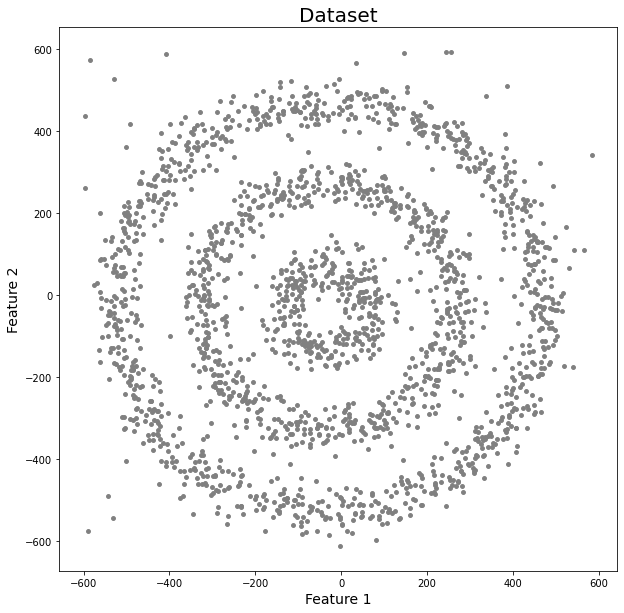

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [21]:
from sklearn.cluster import KMeans

In [25]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

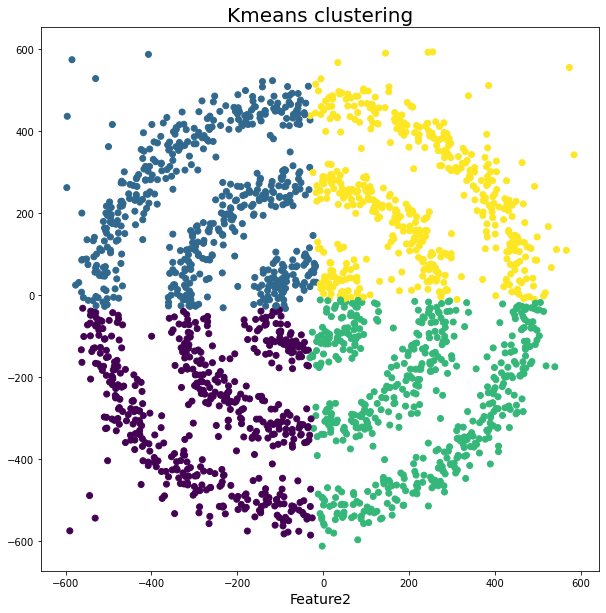

In [29]:
df['Kmeans_labels']=kmeans.labels_
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['Kmeans_labels'])
plt.title('Kmeans clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.xlabel('Feature2',fontsize=14)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

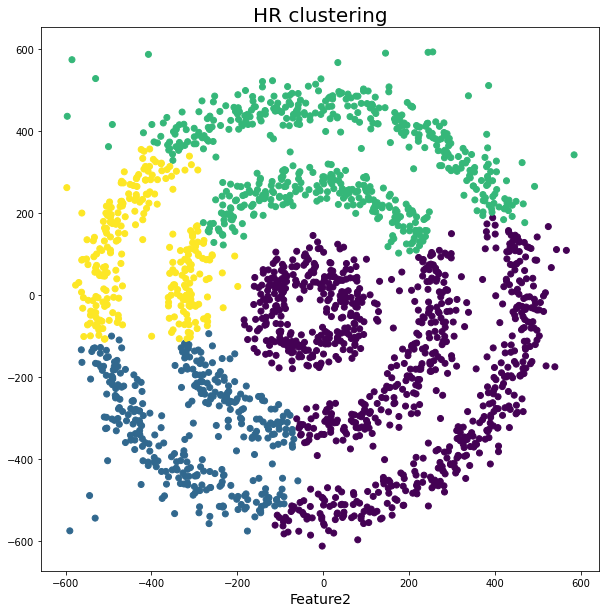

In [28]:
df['HR_labels']=model.labels_
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'])
plt.title('HR clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.xlabel('Feature2',fontsize=14)
plt.show()

In [9]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])


DBSCAN()

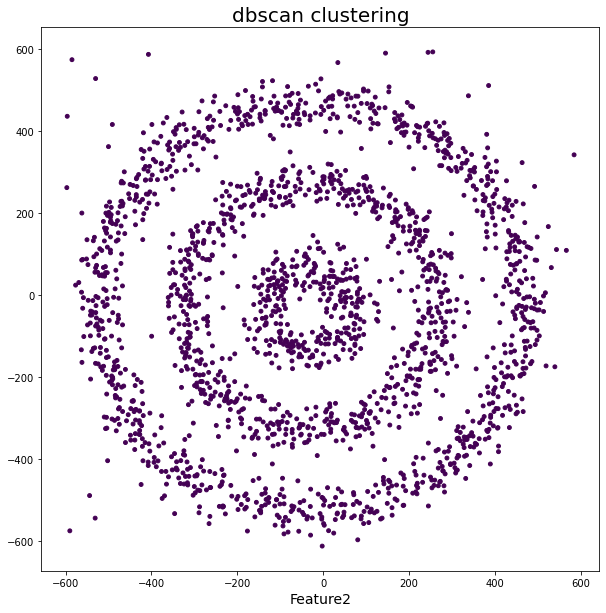

In [12]:
df['dbscan_labels']=dbscan.labels_
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],s=15)
plt.title('dbscan clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.xlabel('Feature2',fontsize=14)
plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(df[[0,1]])
distance,indices=nbrs.kneighbors(df[[0,1]])

In [17]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
distances

array([  0.22379981,   0.22379981,   0.4722822 , ..., 106.88779163,
       119.97082979, 136.41847382])

Text(0, 0.5, 'epsilon')

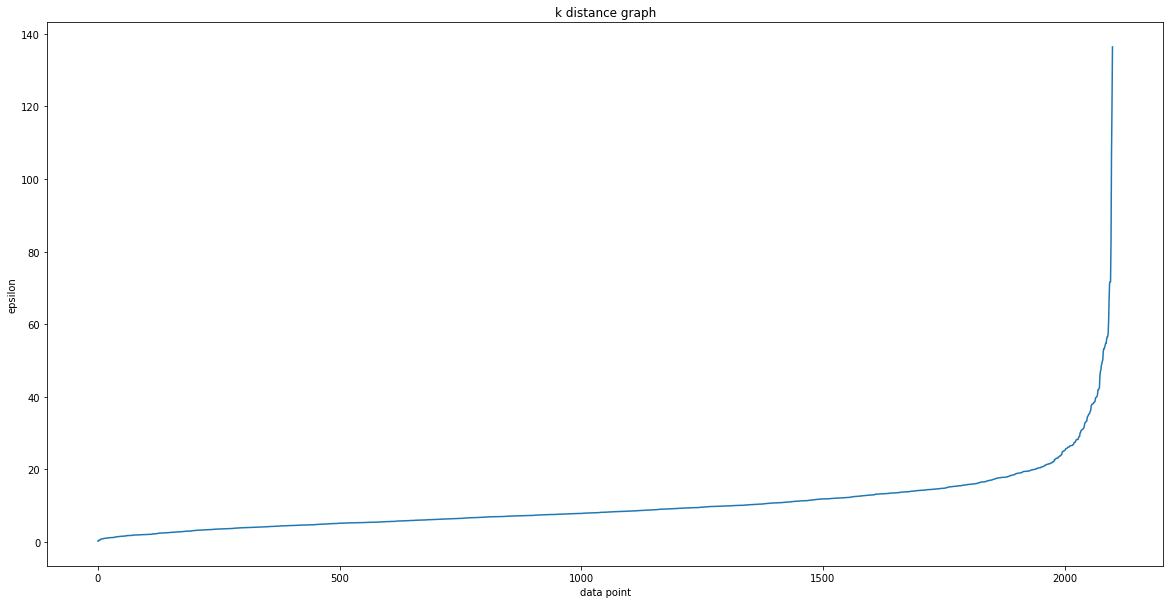

In [18]:
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title("k distance graph")
plt.xlabel("data point")
plt.ylabel("epsilon")

In [41]:

dbscan=DBSCAN(eps=30,min_samples=4)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=4)

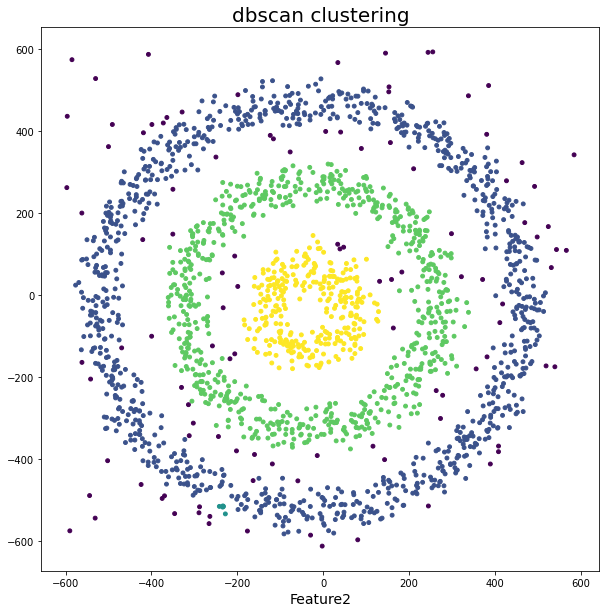

In [42]:
df['dbscan_labels']=dbscan.labels_
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],s=15)
plt.title('dbscan clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.xlabel('Feature2',fontsize=14)
plt.show()